# Описание

Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

# Цели

1. Провести первичную обработку данных
2. Посмотреть распределение числовых переменных и устранить выбросы
3. Оцените количество уникальных значений для номинативных переменных
4. Проведите корреляционный анализ количественных переменных
5. Удалить не коррелирующие переменные
6. Сформулировать выводы

# Осмотр данных

Для начала импортируем необходимые библиотеки и прочитаем данные:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок

students = pd.read_csv('stud_math.csv')

И добавим вспомогательные методы:

In [262]:
def quantiles_info(columns):
    median = columns.median()
    IQR = columns.quantile(0.75) - columns.quantile(0.25)
    perc25 = columns.quantile(0.25)
    perc75 = columns.quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    
def replace_na_with_most_frequent(title):
    most_frequent = students[title].value_counts().index[0]
    students[title] = students[title].apply(lambda x: most_frequent if pd.isna(x) else x)
    
def replace_na_with_value(title, value):
    students[title] = students[title].apply(lambda x: value if pd.isna(x) else x)
    
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', data=students, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [3]:
display(students.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Дадим столбцам более понятные названия:

In [4]:
students.columns = [
    'school',
    'sex',
    'age',
    'area',
    'family_size',
    'cohabitation',
    'mother_education',
    'father_education', 
    'mother_job',
    'father_job',
    'choosing_school_reason',
    'guardian',
    'travel_time',
    'study_time',
    'failures',
    'has_schools_up',
    'has_families_up',
    'has_paid_classes',
    'has_activities',
    'has_nursery',
    'studytime, granular',
    'wants_higher',
    'has_internet',
    'has_romantic',
    'family_relations',
    'free_time',
    'go_out',
    'health',
    'absences',
    'score'
]
display(students.head(1))

,school,sex,age,area,family_size,cohabitation,mother_education,father_education,mother_job,father_job,choosing_school_reason,guardian,travel_time,study_time,failures,has_schools_up,has_families_up,has_paid_classes,has_activities,has_nursery,"studytime, granular",wants_higher,has_internet,has_romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0


In [5]:
students.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                    395 non-null object
sex                       395 non-null object
age                       395 non-null int64
area                      378 non-null object
family_size               368 non-null object
cohabitation              350 non-null object
mother_education          392 non-null float64
father_education          371 non-null float64
mother_job                376 non-null object
father_job                359 non-null object
choosing_school_reason    378 non-null object
guardian                  364 non-null object
travel_time               367 non-null float64
study_time                388 non-null float64
failures                  373 non-null float64
has_schools_up            386 non-null object
has_families_up           356 non-null object
has_paid_classes          355 non-null object
has_activities            381 non-null object
has_nursery      

Можно увидеть, что наши данные распределены следующим образом:

Посмотрим сколько процентов данных пропущенно:

In [10]:
size = len(students)
students.isnull().sum().apply(lambda x: round(x * 100 / size, 2))

school                     0.00
sex                        0.00
age                        0.00
area                       4.30
family_size                6.84
cohabitation              11.39
mother_education           0.76
father_education           6.08
mother_job                 4.81
father_job                 9.11
choosing_school_reason     4.30
guardian                   7.85
travel_time                7.09
study_time                 1.77
failures                   5.57
has_schools_up             2.28
has_families_up            9.87
has_paid_classes          10.13
has_activities             3.54
has_nursery                4.05
studytime, granular        1.77
wants_higher               5.06
has_internet               8.61
has_romantic               7.85
family_relations           6.84
free_time                  2.78
go_out                     2.03
health                     3.80
absences                   3.04
score                      1.52
dtype: float64

Можно заметить, что без пропусков только столбцы school, sex и age.

# Анализ данных

## studytime, granular

Начнем с studytime, granular, потому что описание данного столбца нам неизвестно. По названию можно предположить, что он связан с study_time. Построим для них гистограммы.

In [13]:
students['studytime, granular'].corr(students['study_time'])

-0.9999999999999991

Видим, что studytime, granular сильно коррелирует со study_time, поэтому вряд ли этот столбец даст нам какую-то новую информацию. Удалим его.

In [14]:
students.drop(['studytime, granular'], inplace = True, axis = 1)

## school

In [18]:
students.school.value_counts(normalize=True)

GP    0.883544
MS    0.116456
Name: school, dtype: float64

In [19]:
students[['school', 'score']].groupby(by=['school']).mean()

,score
school,
GP,52.630814
MS,49.444444


Один из немногих столбцов без пропусков. Примерно 88% учаться в школе GP, оставшиеся 12% в MS. Средний бал в школе примерно одинаковый.

## sex

In [23]:
students.sex.value_counts(dropna=False, normalize=True)

F    0.526582
M    0.473418
Name: sex, dtype: float64

In [25]:
students[['sex', 'score']].groupby(by=['sex']).mean()

,score
sex,
F,50.098039
M,54.648649


Пропусков нет. Значения распределены почти по ровну. У мальчиков средний бал чуть выше, чем у девочек.

## age

Посмотрим на распределение:

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

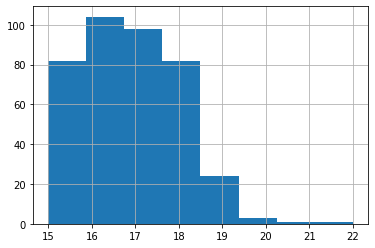

In [31]:
students.age.hist(bins = len(students.age.value_counts()))
students.age.describe()

Видно, что есть ученики с возрастом 22, это противоречит данным о столбце, границы которого от 15 до 22, но судя по остальным данным имеется в виду, что до 22 включительно. Проверим границы выбросов:

In [38]:
quantiles_info(students.age)

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


По формуле интерквартильного расстояния 22 является выбросом, но если руководствоваться здравым смыслом, то это значение не сильно выбивается и вполне может быть правдой. Поэтому оставим его в выборке.

## area

In [41]:
students.area.value_counts(dropna=False, normalize=True)

U      0.746835
R      0.210127
NaN    0.043038
Name: area, dtype: float64

В столбце есть пропущенные значения. Можно подойти основательно и вывести их из известных значений. Например, можно посмотреть на распределение времени пути до школы и заметить, что большинство учеников, которые добираются меньше, чем за 15 минут живут в городе. На основании этого, ученикам с пропущенным значением адреса и небольшим временем дороги до школы можно выставить адрес U. Делать так мы, конечно, не будем, пропущенных значений не очень много, поэтому ничего страшного не должно случиться, если мы заменим на самое частое.

In [57]:
replace_na_with_most_frequent('area')
students.area.value_counts(dropna=False, normalize=True)

U    0.789873
R    0.210127
Name: area, dtype: float64

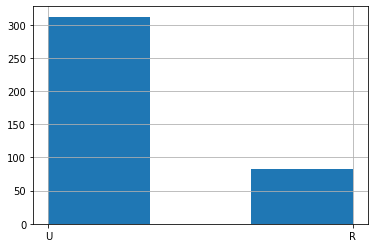

In [60]:
students.area.hist(bins=3)

Готово! Из полученных данных видно, что большинство учеников живет в городе. Результат не выглядит шокирующим.

# family_size

In [61]:
students.family_size.value_counts(dropna=False, normalize=True)

GT3    0.660759
LE3    0.270886
NaN    0.068354
Name: family_size, dtype: float64

В данных есть пропуски, заменим их на самое часто встречающееся значение.

In [72]:
replace_na_with_most_frequent('family_size')
students.family_size.value_counts(dropna=False, normalize=True)

GT3    0.729114
LE3    0.270886
Name: family_size, dtype: float64

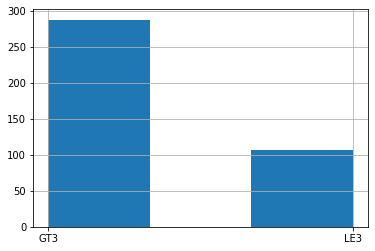

In [73]:
students.family_size.hist(bins=3)

Отлично, большинство студентов 72%, живут в больших семьях.

# cohabitation

In [76]:
students.cohabitation.value_counts(dropna=False, normalize=True)

T      0.794937
NaN    0.113924
A      0.091139
Name: cohabitation, dtype: float64

Очень плохо, много пропущенных значений, настолько много, что мы выделим их в отдельную категорию.

In [78]:
students.cohabitation = students.cohabitation.fillna('N')

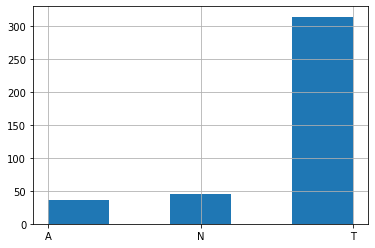

In [82]:
students.cohabitation.hist(bins=5)

Большинство семей полные, вместе живут 79%. Оставшиеся 21% почти поровну разделились между отстутсвие значения и семьями живущими по отдельности. Интересно с чем связаны пропуски значений, возможно люди не хотели отвечать не этот вопрос, потому что живут шведской семьей.

# mother_education

In [83]:
students.mother_education.value_counts(dropna=False, normalize=True)

4.0    0.331646
2.0    0.258228
3.0    0.245570
1.0    0.149367
0.0    0.007595
NaN    0.007595
Name: mother_education, dtype: float64

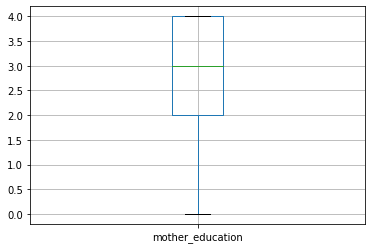

In [84]:
students.boxplot(column='mother_education')

Заменим пропущенные значения на самое частое:

In [94]:
replace_na_with_most_frequent('mother_education')
students.mother_education.value_counts(dropna=False, normalize=True)

4.0    0.339241
2.0    0.258228
3.0    0.245570
1.0    0.149367
0.0    0.007595
Name: mother_education, dtype: float64

Выбросов нет, есть небольшое число пропущенных значений. 33% матерей имеют высшее образование. Значения распределены довольно равномерно.

# father_education

In [86]:
students.father_education.value_counts(dropna=False, normalize=True)

2.0     0.268354
3.0     0.243038
4.0     0.222785
1.0     0.197468
NaN     0.060759
0.0     0.005063
40.0    0.002532
Name: father_education, dtype: float64

Значение должно быть распределено между 0 и 4, но в данных есть значение похожее на выброс. Проверим это.

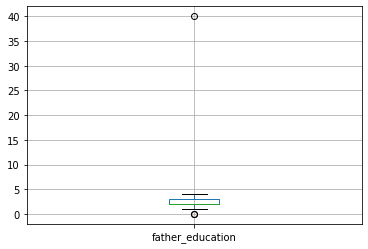

In [87]:
students.boxplot(column='father_education')

Выбросы и правда есть, будем считать, что 40 это ошибка ввода и замен это значение на 4.

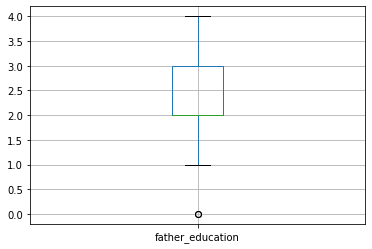

In [90]:
students.father_education = students.father_education.replace(40, 4)
students.boxplot(column='father_education')

Отсутсвие образования тоже считается выбросом, но удалять его мы не будем, потому что оно вписывается в рамки допустимых значений.

Осталось заменить пропущенные данные на самое частое значение:

In [96]:
replace_na_with_most_frequent('father_education')
students.father_education.value_counts(dropna=False, normalize=True)

2.0    0.329114
3.0    0.243038
4.0    0.225316
1.0    0.197468
0.0    0.005063
Name: father_education, dtype: float64

Значения распределены довольно равномерно. Большинство отцов 33% закончило от 2 до 9 классов. Возможно низкий уровень образования отцов объясняется то, почему семьи учеников такие большие. Шутка.

# mother_job

In [97]:
students.mother_job.value_counts(dropna=False, normalize=True)

other       0.336709
services    0.248101
at_home     0.146835
teacher     0.139241
health      0.081013
NaN         0.048101
Name: mother_job, dtype: float64

Все значения соответсвуют категориям, но есть пропуски. Заменим пропуски на other, во-первых это самое частое значение, а во-вторых пропущенные значения вполне подходят к категории other.

In [100]:
replace_na_with_value('mother_job', 'other')
students.mother_job.value_counts(dropna=False, normalize=True)

other       0.384810
services    0.248101
at_home     0.146835
teacher     0.139241
health      0.081013
Name: mother_job, dtype: float64

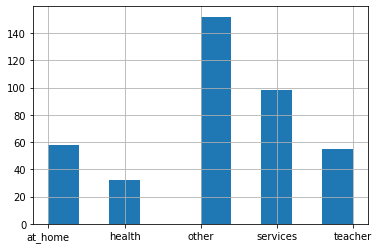

In [101]:
students.mother_job.hist()

График говорит сам за себя. Выбросов нет.

# father_job

In [103]:
students.father_job.value_counts(dropna=False, normalize=True)

other       0.498734
services    0.258228
NaN         0.091139
teacher     0.073418
at_home     0.040506
health      0.037975
Name: father_job, dtype: float64

Заменим пропуски на other:

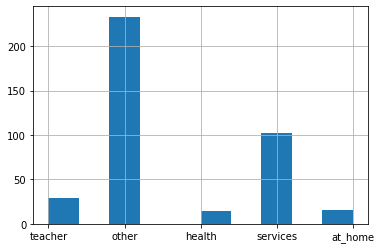

In [105]:
replace_na_with_value('father_job', 'other')
students.father_job.hist()

Очень много отцов работают в категории other, что ставит под сомнеие полезной данной колонки. Выбросов нет.

# choosing_school_reason

In [108]:
students.choosing_school_reason.value_counts(dropna=False, normalize=True)

course        0.346835
home          0.263291
reputation    0.260759
other         0.086076
NaN           0.043038
Name: choosing_school_reason, dtype: float64

Заменим пропуски на other:

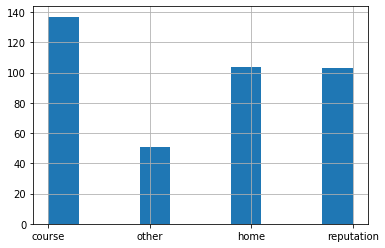

In [109]:
replace_na_with_value('choosing_school_reason', 'other')
students.choosing_school_reason.hist()

Можно увидеть, что образовательная программа является приоритетом при выборе школы. Выбросов нет.

# guardian

In [111]:
students.guardian.value_counts(dropna=False, normalize=True)

mother    0.632911
father    0.217722
NaN       0.078481
other     0.070886
Name: guardian, dtype: float64

Заменим пропуски на other:

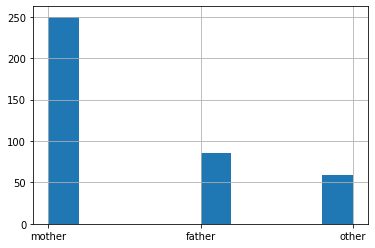

In [112]:
replace_na_with_value('guardian', 'other')
students.guardian.hist()

В данных было небольшое количество пропусков, которое мы отнесли к other. Выбросов нет.

# travel_time

In [114]:
students.travel_time.value_counts(dropna=False, normalize=True)

1.0    0.612658
2.0    0.243038
NaN    0.070886
3.0    0.055696
4.0    0.017722
Name: travel_time, dtype: float64

Видим пропущенные данные и заменяем их на самое частое:

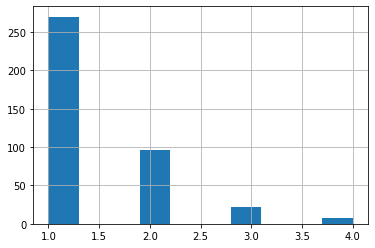

In [116]:
replace_na_with_most_frequent('travel_time')
students.travel_time.hist()

Пропуски исчезли. Сделаем вывод, что большинство учеников живут рядом со школой. Удачное совпадение, что самая лучшая учебная программа в ближайшей школе. Выбросов нет.

# study_time

In [117]:
students.study_time.value_counts(dropna=False, normalize=True)

2.0    0.491139
1.0    0.260759
3.0    0.162025
4.0    0.068354
NaN    0.017722
Name: study_time, dtype: float64

Видим пропущенные данные и заменяем их на самое частое:

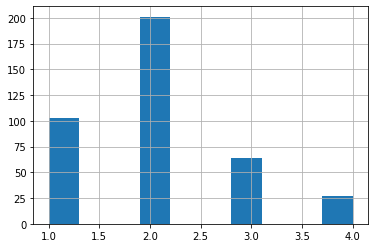

In [119]:
replace_na_with_most_frequent('study_time')
students.study_time.hist()

Видим, что около 50% учеников тратит на учебу от 2 до 5 часов. Выбросов нет.

# failures

In [122]:
students.failures.value_counts(dropna=False, normalize=True)

0.0    0.741772
1.0    0.124051
NaN    0.055696
2.0    0.040506
3.0    0.037975
Name: failures, dtype: float64

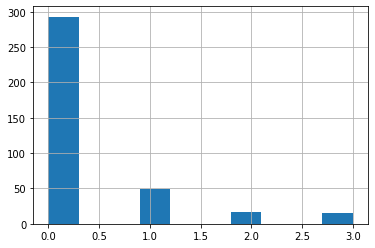

In [126]:
students.failures.hist()

Большинство значений приходится на значение 0, хотя рамки допустимых значений от 1 до 4. Это может значить, что в описании ошибка и рамки должны быть с 0 до 3, а может и не значить, поэтому просто удалим столбец.

In [127]:
students.drop(['failures'], axis=1, inplace=True)

In [128]:
students.head(1)

,school,sex,age,area,family_size,cohabitation,mother_education,father_education,mother_job,father_job,choosing_school_reason,guardian,travel_time,study_time,has_schools_up,has_families_up,has_paid_classes,has_activities,has_nursery,wants_higher,has_internet,has_romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0


# has_schools_up

In [130]:
students.has_schools_up.value_counts(dropna=False, normalize=True)

no     0.848101
yes    0.129114
NaN    0.022785
Name: has_schools_up, dtype: float64

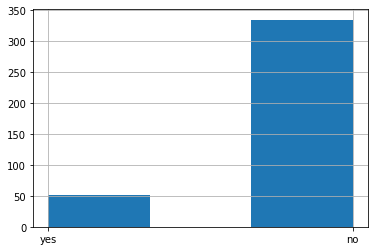

In [132]:
students.has_schools_up.hist(bins=3)

85% учеников не получают поддержки, не получит поддержки от нас и этот столбец. Удалимм его.

In [134]:
students.drop(['has_schools_up'], axis=1, inplace=True)

In [135]:
students.head(1)

,school,sex,age,area,family_size,cohabitation,mother_education,father_education,mother_job,father_job,choosing_school_reason,guardian,travel_time,study_time,has_families_up,has_paid_classes,has_activities,has_nursery,wants_higher,has_internet,has_romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0


# has_families_up

In [136]:
students.has_families_up.value_counts(dropna=False, normalize=True)

yes    0.554430
no     0.346835
NaN    0.098734
Name: has_families_up, dtype: float64

Видим, что выбросов нет, но есть пропущенные значения, так как их довольно много выделим их в отдельную категорию.

In [137]:
students.has_families_up = students.has_families_up.fillna('N')

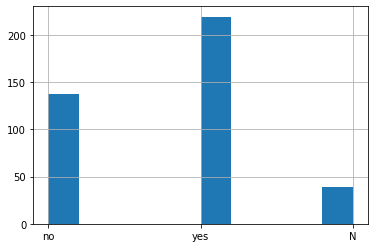

In [138]:
students.has_families_up.hist()

Почти 55% учеников получают поддержку семьи.

# has_paid_classes

In [141]:
students.has_paid_classes.value_counts(dropna=False, normalize=True)

no     0.506329
yes    0.392405
NaN    0.101266
Name: has_paid_classes, dtype: float64

Опять встречаем много пропусков, которые выделяем в отдельную категорию:

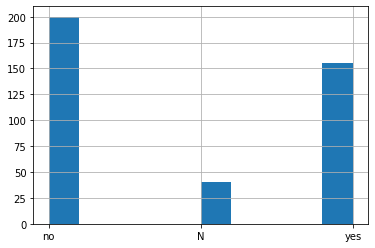

In [144]:
students.has_paid_classes = students.has_paid_classes.fillna('N')
students.has_paid_classes.hist()

У 50% процентов учеников нет платных занятий, а у 40% есть. Интересно, связано ли посещенение платных занятий с поддержкой семьи.

# has_activities

In [145]:
students.has_activities.value_counts(dropna=False, normalize=True)

yes    0.493671
no     0.470886
NaN    0.035443
Name: has_activities, dtype: float64

Заменим пропущенные значения:

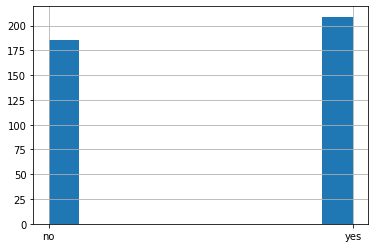

In [146]:
replace_na_with_most_frequent('has_activities')
students.has_activities.hist()

Как видим данные распределены практически поровну, это должно быть хорошо, потому что у нас есть достаточно данных для каждого варианта.

# has_nursery

In [147]:
students.has_nursery.value_counts(dropna=False, normalize=True)

yes    0.759494
no     0.200000
NaN    0.040506
Name: has_nursery, dtype: float64

Заменим пропущенные значения:

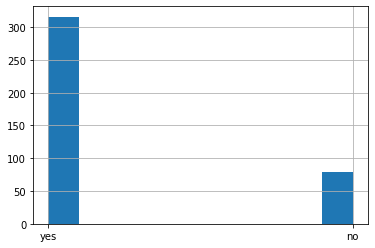

In [150]:
replace_na_with_most_frequent('has_nursery')
students.has_nursery.hist()

После замены пропусков получили, что почти 80% учеников посещали детский сад.

# wants_higher

In [152]:
students.wants_higher.value_counts(dropna=False, normalize=True)

yes    0.901266
NaN    0.050633
no     0.048101
Name: wants_higher, dtype: float64

Более 90% положительных значений, вряд ли возможно использовать эти данные, поэтому просто удалим столбец.

In [153]:
students.drop(['wants_higher'], axis=1, inplace=True)
students.head(1)

,school,sex,age,area,family_size,cohabitation,mother_education,father_education,mother_job,father_job,choosing_school_reason,guardian,travel_time,study_time,has_families_up,has_paid_classes,has_activities,has_nursery,has_internet,has_romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,no,no,no,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0


# has_internet

In [160]:
students.has_internet.value_counts(dropna=False, normalize=True)

yes    0.858228
no     0.141772
Name: has_internet, dtype: float64

Видим пропуски - заменяем пропуски:

In [158]:
replace_na_with_most_frequent('has_internet')

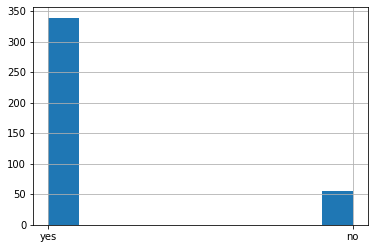

In [159]:
students.has_internet.hist()

Получаем в итоге, что у 85% учеников есть интернет, а у остальных нет.

# has_romantic

In [164]:
students.has_romantic.value_counts(dropna=False, normalize=True)

no     0.607595
yes    0.313924
NaN    0.078481
Name: has_romantic, dtype: float64

Заменим пропуски:

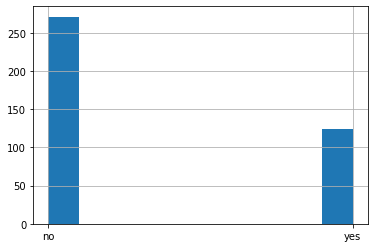

In [168]:
replace_na_with_most_frequent('has_romantic')
students.has_romantic.hist()

Большинство учеников 67% не состоят в романтических отнощениях.

 # family_relations

In [171]:
students.family_relations.value_counts(dropna=False, normalize=True)

 4.0    0.460759
 5.0    0.250633
 3.0    0.156962
 NaN    0.068354
 2.0    0.043038
 1.0    0.017722
-1.0    0.002532
Name: family_relations, dtype: float64

Значения должны быть в границе от 1 до 5 и -1 явно выбивается из этого. Предположим, что это ошибка и заменим -1 на 1.

In [172]:
students.family_relations = students.family_relations.replace(-1, 1)

Заменим пропуски:

In [175]:
replace_na_with_most_frequent('family_relations')

Проверим есть ли выбросы:

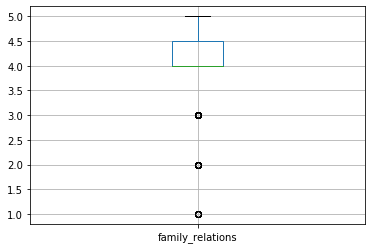

In [176]:
students.boxplot(column='family_relations')

После замены на самое популярное значение выбросов стало еще больше, наверное не стоило так делать. В любом случае математика отказывается верить, что могут быть такие плохие отношения в семье и считает нижние значения выбросами. Мы же эти значения оставим.

In [178]:
students.family_relations.value_counts(dropna=False, normalize=True)

4.0    0.529114
5.0    0.250633
3.0    0.156962
2.0    0.043038
1.0    0.020253
Name: family_relations, dtype: float64

Зато теперь у больше чем половины учеников отношения в семье хорошие.

# free_time

In [181]:
students.free_time.value_counts(dropna=False, normalize=True)

3.0    0.387342
4.0    0.283544
2.0    0.159494
5.0    0.096203
1.0    0.045570
NaN    0.027848
Name: free_time, dtype: float64

Заменим пропуски:

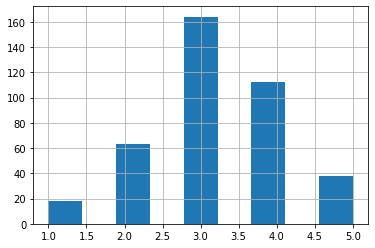

In [188]:
replace_na_with_most_frequent('free_time')
students.free_time.hist(bins=9)

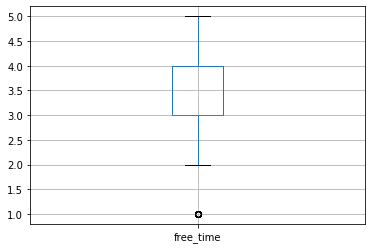

In [189]:
students.boxplot(column='free_time')

Значение 1 считается выбросом, но мы считать выбросом его не будем, потому что оно вполне укладывается в рамки категории. Похоже, что value_counts вполне справляется с определением выборосов, потому что в категориях выбросы это те данные, которые выходят за рамки категории.

# go_out

In [190]:
students.go_out.value_counts(dropna=False, normalize=True)

3.0    0.321519
2.0    0.255696
4.0    0.212658
5.0    0.131646
1.0    0.058228
NaN    0.020253
Name: go_out, dtype: float64

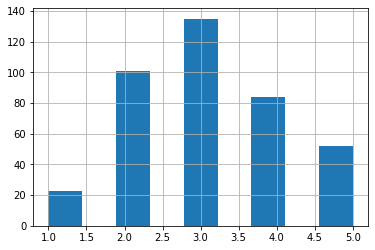

In [192]:
replace_na_with_most_frequent('go_out')
students.go_out.hist(bins=9)

Без лишних слов. Выбросов нет. Пропуски есть.

# health

In [195]:
students.health.value_counts(dropna=False, normalize=True)

5.0    0.349367
3.0    0.225316
4.0    0.159494
1.0    0.118987
2.0    0.108861
NaN    0.037975
Name: health, dtype: float64

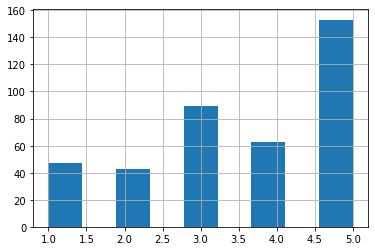

In [197]:
replace_na_with_most_frequent('health')
students.health.hist(bins=9)

Радует, что у 35% школьников такое хорошее здоровье.

# absences

Проверим есть ли пропуски:

In [200]:
students.absences.isna().sum()

12

Предположим, что данные отсутсвуют, потому что пропусков не было:

In [201]:
replace_na_with_value('absences', 0)

count    395.000000
mean       7.058228
std       23.138935
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

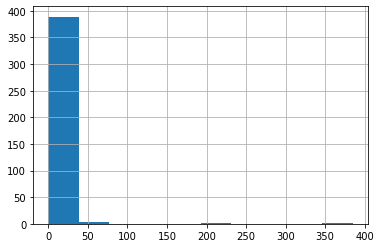

In [208]:
students.absences.hist()
students.absences.describe()

Видим, что значительно преобладает одно значение.

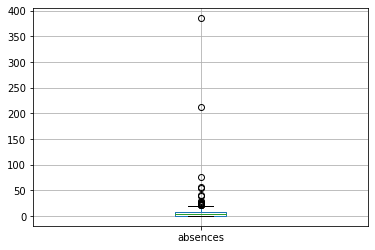

In [204]:
students.boxplot(column='absences')

In [209]:
quantiles_info(students.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


In [215]:
students[students.absences>20].absences.sort_values()

260     21.0
313     22.0
277     22.0
216     22.0
320     23.0
198     24.0
40      25.0
103     26.0
205     28.0
280     30.0
307     38.0
315     40.0
74      54.0
183     56.0
276     75.0
390    212.0
222    385.0
Name: absences, dtype: float64

Последние два значения сильно выбиваются из общей выборки, поэтому удалим их.

In [219]:
students = students[students.absences<=75]

In [221]:
students.absences.sort_values()

124     0.0
333     0.0
134     0.0
135     0.0
136     0.0
       ... 
307    38.0
315    40.0
74     54.0
183    56.0
276    75.0
Name: absences, Length: 393, dtype: float64

Красота! Мы заполнили пропуски и удалили выбросы, а так же увидели, что большинство учеников прилежные и занятие не пропускают.

# score

Это наша предсказываемая величина. Посмотрим на нее поближе.

In [225]:
students.score.value_counts(dropna=False, normalize=True)

50.0     0.137405
55.0     0.117048
0.0      0.094148
75.0     0.083969
65.0     0.078880
40.0     0.078880
60.0     0.078880
70.0     0.068702
45.0     0.066158
80.0     0.040712
30.0     0.038168
90.0     0.030534
35.0     0.022901
25.0     0.017812
NaN      0.015267
95.0     0.012723
85.0     0.012723
100.0    0.002545
20.0     0.002545
Name: score, dtype: float64

В столбце есть пропуски, не хочется делать какие-то допущения, поэтому просто удалим их.

In [235]:
students.dropna(subset=['score'], inplace=True)
students.score.value_counts(dropna=False, normalize=True)

50.0     0.139535
55.0     0.118863
0.0      0.095607
75.0     0.085271
65.0     0.080103
40.0     0.080103
60.0     0.080103
70.0     0.069767
45.0     0.067183
80.0     0.041344
30.0     0.038760
90.0     0.031008
35.0     0.023256
25.0     0.018088
85.0     0.012920
95.0     0.012920
100.0    0.002584
20.0     0.002584
Name: score, dtype: float64

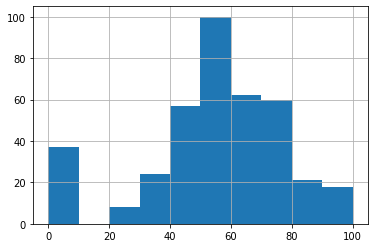

In [236]:
students.score.hist()

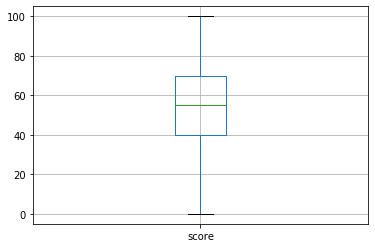

In [237]:
students.boxplot(column='score')

Стоблец с 0 баллов выглядит странно, но все в порядке, выбросов нет. Возможно в дальнейшем стоит рассмотреть два варианта, с учетом 0 и без.

* * *

Нами был проведен анализ данных, были устранены выбросы и заполнены пропуски. Так же были удалены следующие столбцы: 'studytime, granular', 'failures', 'has_schools_up' и 'wants_higher'

# Корреляционный анализ

Проведем кореляционный анализ для количественных переменных: age, absences и score.

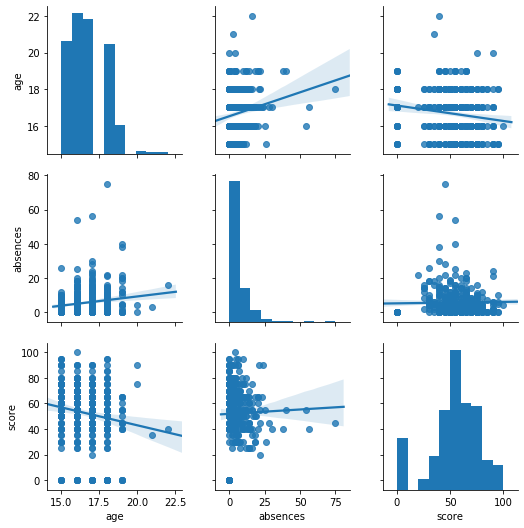

In [239]:
sns.pairplot(students[['age', 'absences', 'score']], kind = 'reg')

Заодно построим матрицу корреляций:

In [240]:
students[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.168017,-0.153488
absences,0.168017,1.000000,0.023926
score,-0.153488,0.023926,1.000000


Score очень слабо коррелирует как с age, так и с absences. Похоже, что колиство посещенных занятий не влияет на итоговую оценку.

In [264]:
for col in ['age', 'absences']:
    get_stat_dif(col)

* * *
Корреляционный анализ показал, что искомая переменная слабо коррелирует с age и absences.

# Анализ номинативных переменных

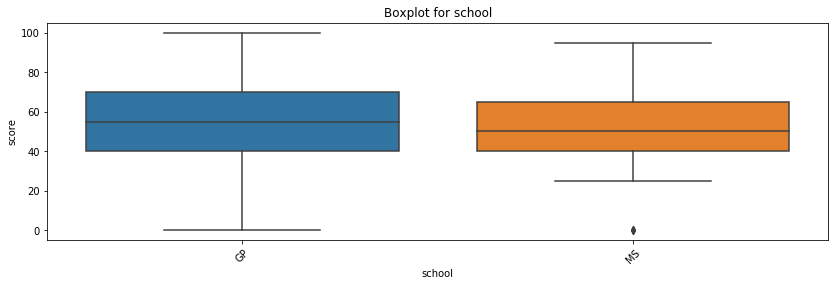

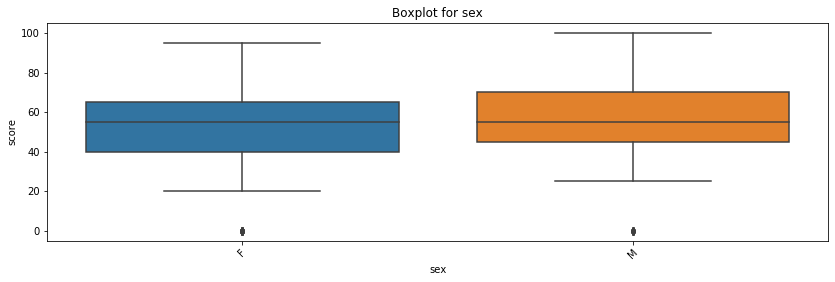

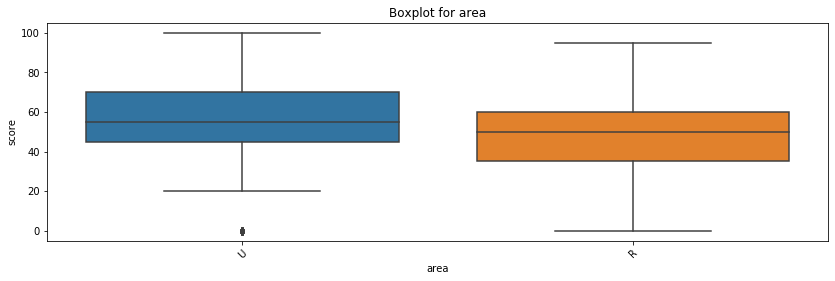

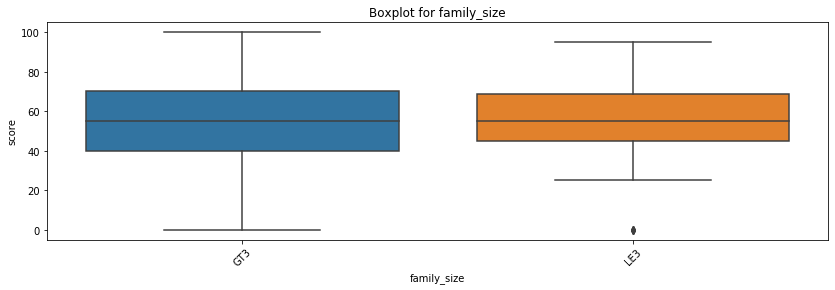

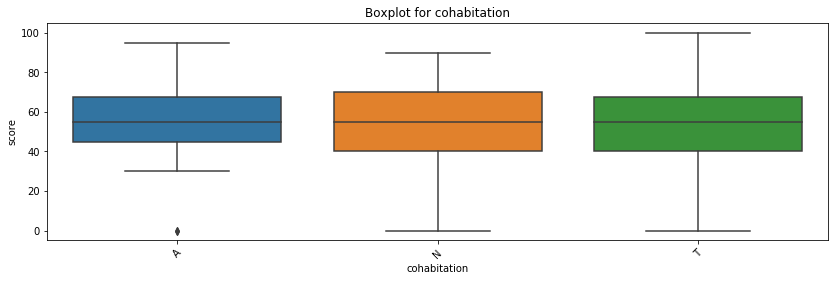

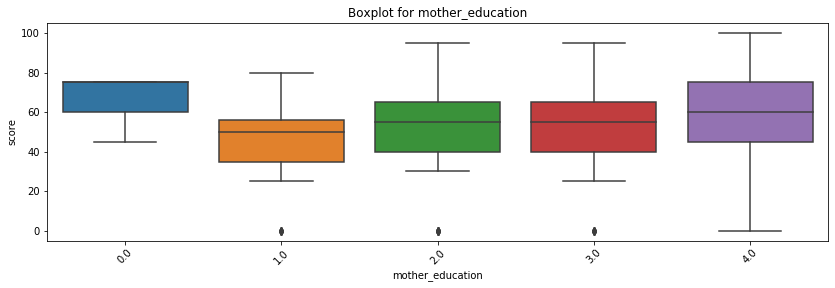

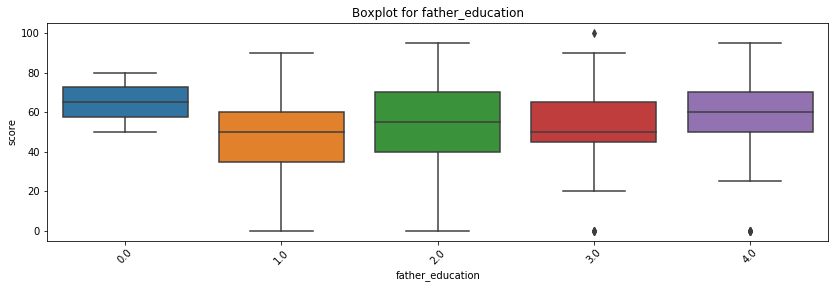

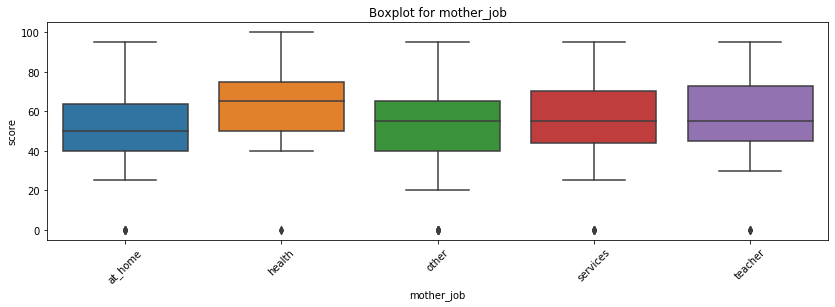

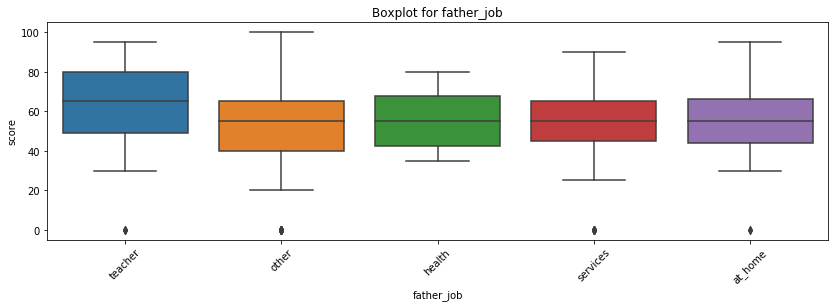

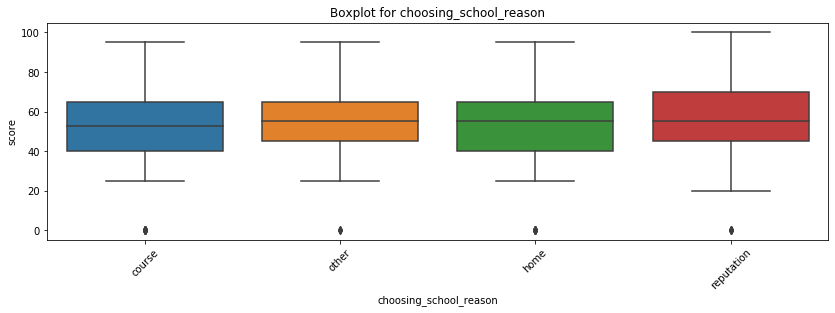

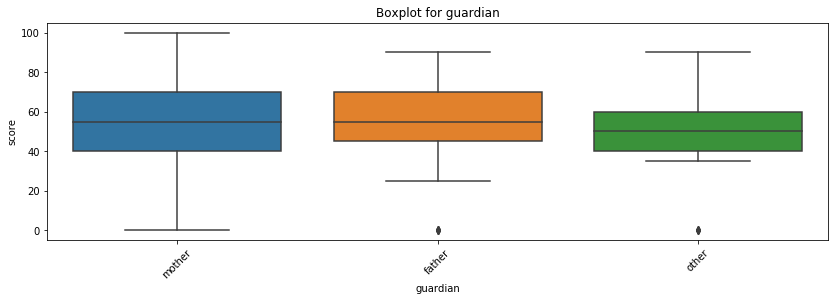

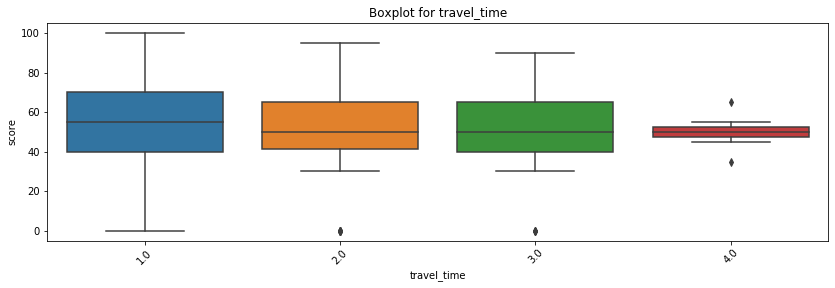

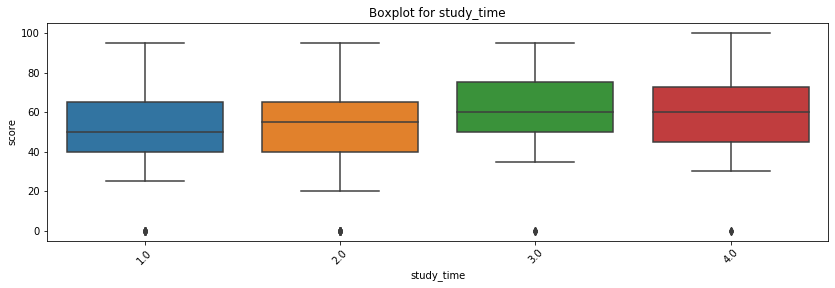

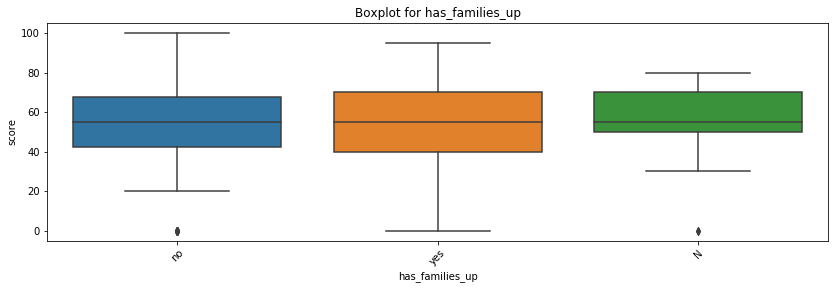

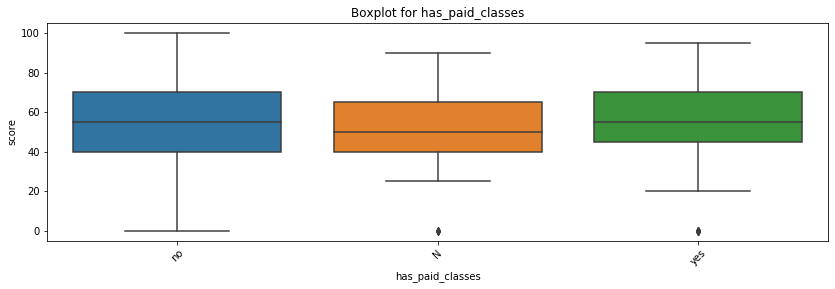

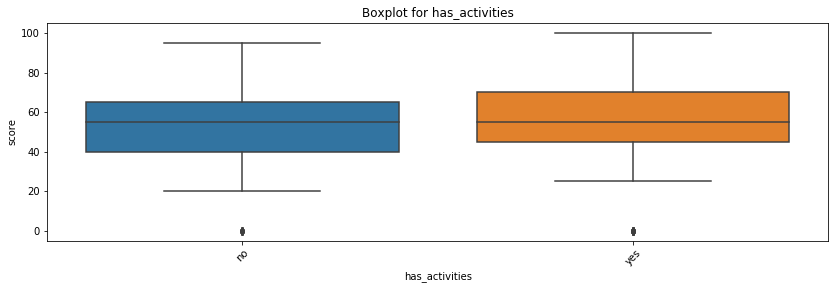

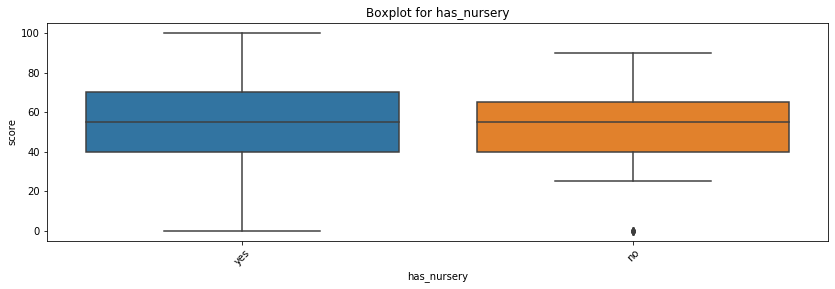

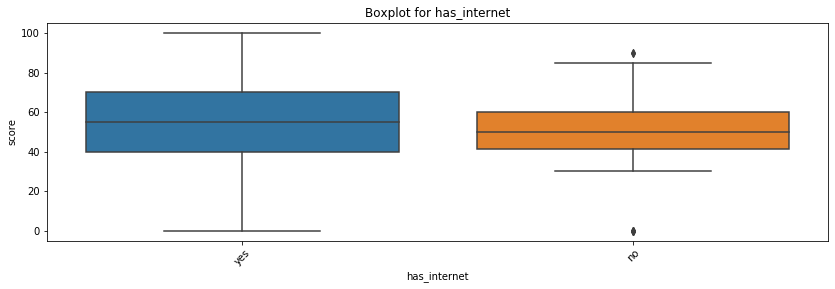

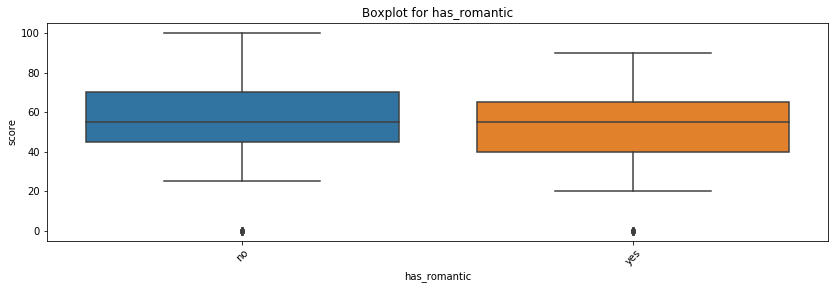

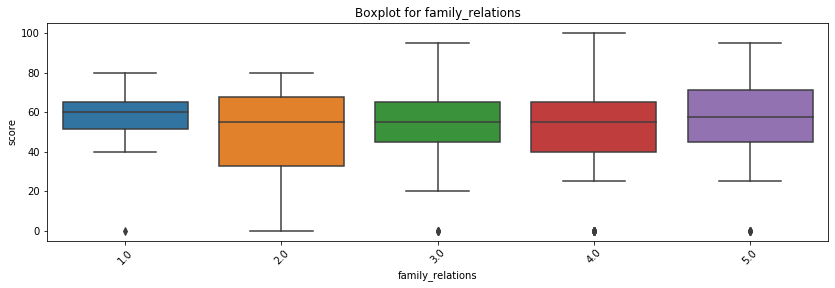

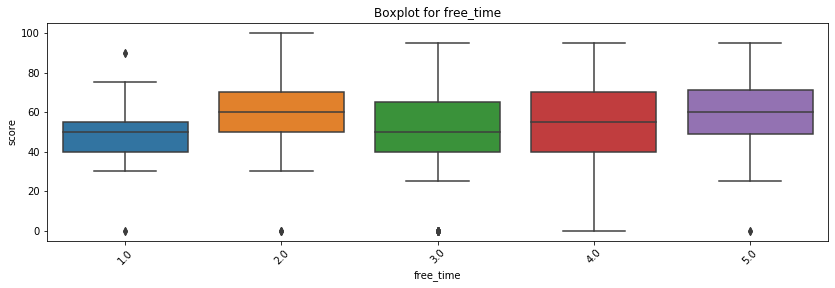

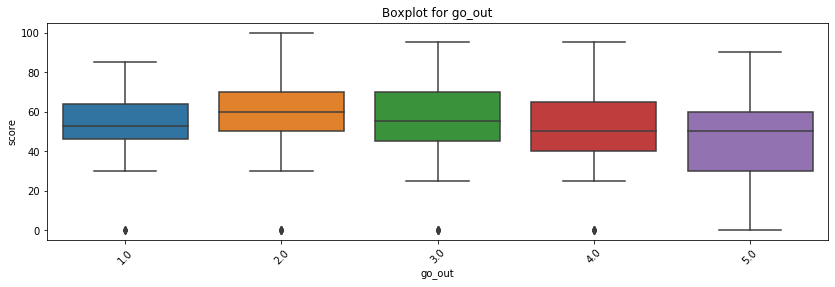

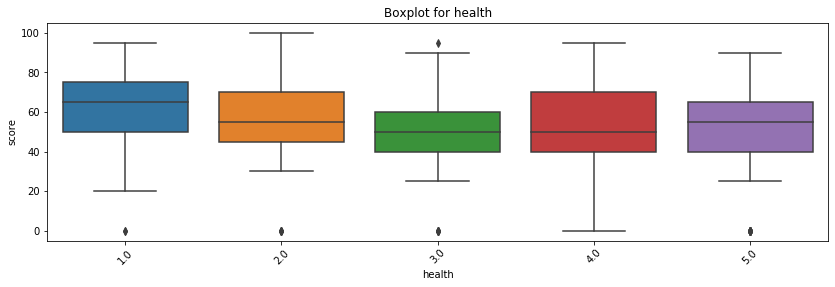

In [258]:
for col in ['school', 'sex', 'area', 'family_size', 'cohabitation',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'choosing_school_reason', 'guardian', 'travel_time', 'study_time',
       'has_families_up', 'has_paid_classes',
       'has_activities', 'has_nursery', 'has_internet',
       'has_romantic', 'family_relations', 'free_time', 'go_out', 'health']:
    get_boxplot(col)

А теперь проверим влияние этих переменных на искомую величину.

In [265]:
for col in ['school', 'sex', 'area', 'family_size', 'cohabitation',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'choosing_school_reason', 'guardian', 'travel_time', 'study_time',
       'has_families_up', 'has_paid_classes',
       'has_activities', 'has_nursery', 'has_internet',
       'has_romantic', 'family_relations', 'free_time', 'go_out', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки area
Найдены статистически значимые различия для колонки mother_education
Найдены статистически значимые различия для колонки mother_job
Найдены статистически значимые различия для колонки has_romantic


Оставим в таблице только те значения, которые влияют на искомую переменную:

In [268]:
result = students[['sex', 'area', 'mother_education', 'mother_job', 'has_romantic', 'score']]
result

,sex,area,mother_education,mother_job,has_romantic,score
0,F,U,4.0,at_home,no,30.0
1,F,U,1.0,at_home,no,30.0
2,F,U,1.0,at_home,no,50.0
3,F,U,4.0,health,yes,75.0
4,F,U,3.0,other,no,50.0
...,...,...,...,...,...,...
389,F,U,1.0,other,no,0.0
391,M,U,3.0,services,no,80.0
392,M,R,1.0,other,no,35.0
393,M,R,3.0,services,no,50.0


# Итоги

В результате проведенного анализа можно сделать следующие выводы:
- Данные содержат достаточно мало пропущенных значений, только в 3 столбцах пропусков около 10%
- Ошибок и выбросов мало, в основном они штучные
- Данные в некоторых столбцах оказались слишком однородными и столбцы пришлось удалить
- На первом месте среди параметров влияющих на искомую переменную идет 'sex', за ним идут 'area', 'mother_education', 'mother_job', 'has_romantic', 'score'